# COGS 108 - NBA Travel Data Analytics Project

**Video Link:** https://www.youtube.com/watch?v=TKpbT0wsWUc

# Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[ ] YES - make available
[X] NO - keep private

# Names

- Seanna Pierce
- Noah Poremba
- Emily Parise
- Jennifer Qi

## Overview
The project focuses on the question whether travel will impact the outcome of NBA games specifically looking at data from the 2013-2015 seasons. More specifically, we hypothesized that the more a team traveled to their game the higher negative impact it would have on their overall score because of travel fatigue and home team advantage. In this project, we took into account factors such as only analyzing the regular season and not assuming any outside travel. With what we saw in our data analysis, we have revised our hypothesis.

# Research Question
How do a set of random teams in the NBA perform (i.e. winning percentage) based on total miles traveled for each game throughout a season? Does this effect of travel on performance hold throughout multiple years? Are all these teams equally affected by travel (i.e. statistical significance) or does this only happen to a select few?

# Background and Prior Work
Professional sports leagues in America operate under multi-billion dollar budgets and attract fans from all over the world. These leagues usually consist of around 30 teams spread across all of North America. Teams have to travel on the road to play opponents for half of the regular season schedule, while the other half of games are played at home. It is well known that traveling great distances via airplane can have significant effects on the human body like fuzzy thinking, jet-lag, and fatigue. Our project proposal aims to identify if the amount of travel a team takes on plays a role in the teams overall winning percentage.

[^TalkBasket.net]: During the 2017/2018 NBA season, the average total mileage a team traveled was 46,390. Some teams traveled way above this average while others traveled less. According to the data from that season, there seemed to be no distinct advantage of traveling less. Our team will look at more data sets and run additional analytics to more thoroughly answer the research question.

[^Steenland]: Based on another study, it was found that more time in between games had a positive impact on game performance. This study did not find much of a connection between travel and game performance but found that changing time zones (i.e. changes in circadian rhythm) could play a part in a team’s success.

[^TalkBasket.net]: (13 Feb 2019) Which team travels the farthest in an NBA season?. TalkBasket.net. https://www.talkbasket.net/37319-which-team-travels-the-farthest-in-an-nba-season

[^Steenland]: Steenland, K. (Jun 1997) Effect of Travel and Rest on Performance of Professional Basketball Players. Research Gate. https://www.researchgate.net/publication/13849054_Effect_of_Travel_and_Rest_on_Performance_of_Professional_Basketball_Players

##Hypothesis
We hypothesize that a team that had to travel a greater distance for a game is more likely to lose than the team that traveled less distance. Traveling can be disorienting and have a negative impact on a player’s performance, so a greater degree of it will lead to more effects. Since the impact of travel is also dependent on whether it was eastward or westward, we also hypothesize that traveling eastward will lead to a greater likelihood of loss than westward.


# Dataset(s)

- Dataset Name: Nba_games_2015_2016.csv
- Link to the dataset: https://github.com/ixarchakos/nba-games/blob/master/data/nba_games_2015_2016.csv
- Number of observations: 1230

This dataset contains information on games played in the 2015-2016 season, this includes the home team and their score, the away team and their score as well as stats on 3 point shots, rebounds, fouls and other game statistics that we do not need for our analysis.

- Dataset Name: nba_games_2014_2015.csv
- Link to the dataset: https://github.com/ixarchakos/nba-games/blob/master/data/nba_games_2014_2015.csv
- Number of observations: 1230

This dataset contains information on games played in the 2014-2015 season, this includes the home team and their score, the away team and their score as well as stats on 3 point shots, rebounds, fouls and other game statistics that we do not need for our analysis.

- Dataset Name: Nba_games_2013_2014.csv
- Link to the dataset: https://github.com/ixarchakos/nba-games/blob/master/data/nba_games_2013_2014.csv
- Number of observations: 1229

This dataset contains information on games played in the 2013-2014 season, this includes the home team and their score, the away team and their score as well as stats on 3 point shots, rebounds, fouls and other game statistics that we do not need for our analysis.

Since our question deals with evaluating each individual year, it is beneficial to us that these datasets are separate. We will also keep the data of how far the teams travelled in their respective years in separate datasets.

- Dataset Name: teams.csv
- Link to the dataset: https://github.com/danielfrg/espn-nba-scrapy/blob/master/data/teams.csv
- Number of observations: 30

This dataset contains the full names of all the NBA teams as well as their commonly used abbreviations. We will use these abbreviations to shorten and standardize our code.

- Dataset Name: Age of Arena.csv
- Link to the dataset: https://github.com/matiullah23/nba-attendance/blob/master/Data/Age%20of%20Arena.csv
- Number of observations: 30

This dataset contains information on the home arenas of each NBA team, such as the arena's city, name, capacity, and more. We only need the coordinates for each associated team. This will be used to calculate the distance a team travels as a column in dataframes about matches, but the coordinate information itself is not included.





# Setup

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Get CSV data
games_13 = pd.read_csv('https://github.com/ixarchakos/nba-games/blob/master/data/nba_games_2013_2014.csv?raw=true')
games_14 = pd.read_csv('https://github.com/ixarchakos/nba-games/blob/master/data/nba_games_2014_2015.csv?raw=true')
games_15 = pd.read_csv('https://github.com/ixarchakos/nba-games/blob/master/data/nba_games_2015_2016.csv?raw=true')
abbrevData = pd.read_csv('https://raw.githubusercontent.com/danielfrg/espn-nba-scrapy/master/data/teams.csv')
coordData = pd.read_csv('https://raw.githubusercontent.com/matiullah23/nba-attendance/master/Data/Age%20of%20Arena.csv', encoding = 'iso-8859-1')

# Data Cleaning

We deleted unnecessary columns and replaced full team names with their three letter abbreviations. DataFrames were then created for each team for every season that of which contained all games said team played in, home and away.

Our next step is to calculate the total distance each team traveled for each season, comparing them to each other. We will do this by using our own distance formula.

In [ ]:
# Clean CSV data for team abbreviations


# Remove unwanted columns
abbrevData = abbrevData[['name', 'prefix_1']]

# NOTE: Due to rebranding, some team names are different across datasets.
# Will use most recent branding for consistency.
# New Orleans Pelicans (NOP)
# Charlotte Hornets (CHA)
abbrevData = abbrevData.replace(['New Orleans Hornets', 'Charlotte Bobcats'], ['New Orleans Pelicans', 'Charlotte Hornets'])

# Team abbreviations should be the same as official
abbrevData = abbrevData.replace(['ny', 'gs', 'no', 'sa'], ['NYK', 'GSW', 'NOP', 'SAS'])
abbrevData['prefix_1'] = abbrevData['prefix_1'].map(str.upper)

abbrevData.head()

abbrevDict = dict(abbrevData.values)
abbrevDict

{'Boston Celtics': 'BOS',
 'Brooklyn Nets': 'BKN',
 'New York Knicks': 'NYK',
 'Philadelphia 76ers': 'PHI',
 'Toronto Raptors': 'TOR',
 'Golden State Warriors': 'GSW',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Phoenix Suns': 'PHX',
 'Sacramento Kings': 'SAC',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Detroit Pistons': 'DET',
 'Indiana Pacers': 'IND',
 'Milwaukee Bucks': 'MIL',
 'Dallas Mavericks': 'DAL',
 'Houston Rockets': 'HOU',
 'Memphis Grizzlies': 'MEM',
 'New Orleans Pelicans': 'NOP',
 'San Antonio Spurs': 'SAS',
 'Atlanta Hawks': 'ATL',
 'Charlotte Hornets': 'CHA',
 'Miami Heat': 'MIA',
 'Orlando Magic': 'ORL',
 'Washington Wizards': 'WSH',
 'Denver Nuggets': 'DEN',
 'Minnesota Timberwolves': 'MIN',
 'Oklahoma City Thunder': 'OKC',
 'Portland Trail Blazers': 'POR',
 'Utah Jazz': 'UTA'}

In [ ]:
# Clean CSV data for coordinates

coordData = coordData[['Team', 'Coordinates']]
coordData = coordData.dropna(subset=['Team'])

def getListCoords(input):
    string = str(input)
    string = string.replace('¡N', '')
    string = string.replace('¡W', '')
    list = string.split(' ')
    list = [float(i) for i in list]

    return list

coordData['Coordinates'] = coordData['Coordinates'].apply(getListCoords)

def getAbbrev(string):
    return abbrevDict[string]

coordData['Team'] = coordData['Team'].apply(getAbbrev)

coordDict = dict(coordData.values)
coordDict

{'ATL': [33.757222, 84.396389],
 'BOS': [42.366303, 71.062228],
 'BKN': [40.68265, 73.974689],
 'CHA': [35.225, 80.839167],
 'CHI': [41.880556, 87.674167],
 'CLE': [41.496389, 81.688056],
 'DAL': [32.790556, 96.810278],
 'DEN': [39.748611, 105.0075],
 'DET': [42.696944, 83.245556],
 'GSW': [37.750278, 122.203056],
 'HOU': [29.750833, 95.362222],
 'IND': [39.763889, 86.155556],
 'LAC': [34.043056, 118.267222],
 'LAL': [34.043056, 118.267222],
 'MEM': [35.138333, 90.050556],
 'MIA': [25.781389, 80.188056],
 'MIL': [43.043611, 87.916944],
 'MIN': [44.979444, 93.276111],
 'NOP': [29.948889, 90.081944],
 'NYK': [40.750556, 73.993611],
 'OKC': [35.463333, 97.515],
 'ORL': [28.539167, 81.383611],
 'PHI': [39.901111, 75.171944],
 'PHX': [33.445833, 112.071389],
 'POR': [45.531667, 122.666667],
 'SAC': [38.649167, 121.518056],
 'SAS': [29.426944, 98.4375],
 'TOR': [43.643333, 79.379167],
 'UTA': [40.768333, 111.901111],
 'WSH': [38.898056, 77.020833]}

In [ ]:
# CLean CSV data for NBA seasons

# Remove unwanted columns
keep_cols = ['date', 'home_team', 'home_points', 'away_team', 'away_points']
games_13 = games_13[keep_cols]
games_14 = games_14[keep_cols]
games_15 = games_15[keep_cols]

# Replace team names so that they are consistent between dataframes


def convertTeamNames(df):
    df = df.replace(['NY', 'GS', 'NO', 'SA'], ['NYK', 'GSW', 'NOP', 'SAS'])
    df = df.replace(['Utah', 'Knicks', 'Charlotte Bobcats', 'New Orleans Hornets'], ['Utah Jazz', 'New York Knicks', 'Charlotte Hornets', 'New Orleans Pelicans'])
    df = df.replace(abbrevDict.keys(), abbrevDict.values())
    df = df.replace('UTAH', 'UTA')
    return df

games_13 = convertTeamNames(games_13)
games_14 = convertTeamNames(games_14)
games_15 = convertTeamNames(games_15)


In [ ]:
# This function, given two coordinates in latitude and longitude, calculates the distance between them (on a sphere in miles).

def haversine(coor1, coor2):
    coor1 = np.radians(coor1)
    coor2 = np.radians(coor2)

    lats = coor2[0] - coor1[0];
    long = coor2[1] - coor1[1];

    a = np.sin(lats/2)**2 + np.cos(coor1[0]) * np.cos(coor2[0]) * np.sin(long/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    radius = 6371

    distance = radius * c

    conversion =  0.621371

    return distance * conversion

In [ ]:
# This function accepts two teams, extracts the coordinates of their arenas, and returns the distance between them using the haversine function.

def distance(home, away):
    home_coor = coordDict[home]
    away_coor = coordDict[away]

    return haversine(home_coor, away_coor)

In [ ]:
games_13['distance_traveled'] = pd.Series(list(map(lambda x, y: distance(x, y), games_13['home_team'], games_13['away_team'])))
games_14['distance_traveled'] = pd.Series(list(map(lambda x, y: distance(x, y), games_14['home_team'], games_14['away_team'])))
games_15['distance_traveled'] = pd.Series(list(map(lambda x, y: distance(x, y), games_15['home_team'], games_15['away_team'])))

In [ ]:
games_14.head()

,date,home_team,home_points,away_team,away_points,distance_traveled
0,2014-10-28,NOP,101,ORL,84,533.223204
1,2014-10-28,SAS,101,DAL,100,251.538659
2,2014-10-28,LAL,90,HOU,108,1372.819230
3,2014-10-29,CHA,108,MIL,106,659.527236
4,2014-10-29,IND,103,PHI,91,582.480024


In [ ]:
# Create df for each team per season using slicing

# 13-14
PHX_13 = games_13.loc[(games_13['home_team'] == 'PHX') | (games_13['away_team'] == 'PHX')]
CHI_13 = games_13.loc[(games_13['home_team'] == 'CHI') | (games_13['away_team'] == 'CHI')]
PHI_13 = games_13.loc[(games_13['home_team'] == 'PHI') | (games_13['away_team'] == 'PHI')]
ORL_13 = games_13.loc[(games_13['home_team'] == 'ORL') | (games_13['away_team'] == 'ORL')]
CLE_13 = games_13.loc[(games_13['home_team'] == 'CLE') | (games_13['away_team'] == 'CLE')]
MIL_13 = games_13.loc[(games_13['home_team'] == 'MIL') | (games_13['away_team'] == 'MIL')]
CHA_13 = games_13.loc[(games_13['home_team'] == 'CHA') | (games_13['away_team'] == 'CHA')]
LAL_13 = games_13.loc[(games_13['home_team'] == 'LAL') | (games_13['away_team'] == 'LAL')]
BKN_13 = games_13.loc[(games_13['home_team'] == 'BKN') | (games_13['away_team'] == 'BKN')]
MIA_13 = games_13.loc[(games_13['home_team'] == 'MIA') | (games_13['away_team'] == 'MIA')]

# 14-15
PHX_14 = games_14.loc[(games_14['home_team'] == 'PHX') | (games_14['away_team'] == 'PHX')]
CHI_14 = games_14.loc[(games_14['home_team'] == 'CHI') | (games_14['away_team'] == 'CHI')]
PHI_14 = games_14.loc[(games_14['home_team'] == 'PHI') | (games_14['away_team'] == 'PHI')]
ORL_14 = games_14.loc[(games_14['home_team'] == 'ORL') | (games_14['away_team'] == 'ORL')]
CLE_14 = games_14.loc[(games_14['home_team'] == 'CLE') | (games_14['away_team'] == 'CLE')]
MIL_14 = games_14.loc[(games_14['home_team'] == 'MIL') | (games_14['away_team'] == 'MIL')]
CHA_14 = games_14.loc[(games_14['home_team'] == 'CHA') | (games_14['away_team'] == 'CHA')]
LAL_14 = games_14.loc[(games_14['home_team'] == 'LAL') | (games_14['away_team'] == 'LAL')]
BKN_14 = games_14.loc[(games_14['home_team'] == 'BKN') | (games_14['away_team'] == 'BKN')]
MIA_14 = games_14.loc[(games_14['home_team'] == 'MIA') | (games_14['away_team'] == 'MIA')]

# 15-16
PHX_15 = games_15.loc[(games_15['home_team'] == 'PHX') | (games_15['away_team'] == 'PHX')]
CHI_15 = games_15.loc[(games_15['home_team'] == 'CHI') | (games_15['away_team'] == 'CHI')]
PHI_15 = games_15.loc[(games_15['home_team'] == 'PHI') | (games_15['away_team'] == 'PHI')]
ORL_15 = games_15.loc[(games_15['home_team'] == 'ORL') | (games_15['away_team'] == 'ORL')]
CLE_15 = games_15.loc[(games_15['home_team'] == 'CLE') | (games_15['away_team'] == 'CLE')]
MIL_15 = games_15.loc[(games_15['home_team'] == 'MIL') | (games_15['away_team'] == 'MIL')]
CHA_15 = games_15.loc[(games_15['home_team'] == 'CHA') | (games_15['away_team'] == 'CHA')]
LAL_15 = games_15.loc[(games_15['home_team'] == 'LAL') | (games_15['away_team'] == 'LAL')]
BKN_15 = games_15.loc[(games_15['home_team'] == 'BKN') | (games_15['away_team'] == 'BKN')]
MIA_15 = games_15.loc[(games_15['home_team'] == 'MIA') | (games_15['away_team'] == 'MIA')]

In [ ]:
PHX_15.head()

,date,home_team,home_points,away_team,away_points,distance_traveled
13,2015-10-28,PHX,95,DAL,111,883.508531
31,2015-10-30,PHX,110,POR,92,1006.243474
36,2015-10-31,POR,90,PHX,101,1006.243474
51,2015-11-02,LAC,102,PHX,96,358.294116
66,2015-11-04,PHX,118,SAC,97,637.992061


In [ ]:
# !!! CHANGED
# Added a new array that keeps track of what is added to cumulative distance for each match.
# This will become a column match_dist, representing how much the team traveled for the match.

def teamDist(df, name):
    df = df.reset_index(drop=True)
    sum = 0
    distAtTime = []

    distAdded = []
    for index, row in df.iterrows():
        if index - 1 == -1:
            if row['home_team'] == name:
                sum += 0

                distAdded.append(0)
            else:
                # sum += row[distance_traveled]
                sum += distance(row['home_team'], name)

                distAdded.append(distance(row['home_team'], name))
        elif row['home_team'] == name: # is home team
            if df.loc[index - 1, 'home_team'] == name:
                # stayed at home stadium
                sum += 0

                distAdded.append(0)
            else:
                # moved from other team stadium to home
                team = df.loc[index - 1, 'home_team']
                # get distance from team stadium to their home stadium
                sum += distance(team, name)

                distAdded.append(distance(team, name))
        else: # is away team
            if df.loc[index - 1, 'home_team'] == name:
                # moved from home to other team stadium
                team = df.loc[index, 'home_team']
                sum += distance(team, name)

                distAdded.append(distance(team, name))
            else:
                # moved from other team stadium to another team stadium
                prevTeam = df.loc[index - 1, 'home_team']
                team = df.loc[index, 'home_team']
                sum += distance(team, prevTeam)

                distAdded.append(distance(team, prevTeam))
        distAtTime.append(sum)

    col1 = pd.DataFrame(distAtTime)
    col1.columns = ['team_dist']

    col2 = pd.DataFrame(distAdded)
    col2.columns = ['match_dist']

    return pd.concat([col1, col2], axis = 1)

In [ ]:
PHX_13 = PHX_13.reset_index(drop=True)
CHI_13 = CHI_13.reset_index(drop=True)
PHI_13 = PHI_13.reset_index(drop=True)
ORL_13 = ORL_13.reset_index(drop=True)
CLE_13 = CLE_13.reset_index(drop=True)
MIL_13 = MIL_13.reset_index(drop=True)
CHA_13 = CHA_13.reset_index(drop=True)
LAL_13 = LAL_13.reset_index(drop=True)
BKN_13 = BKN_13.reset_index(drop=True)
MIA_13 = MIA_13.reset_index(drop=True)

PHX_14 = PHX_14.reset_index(drop=True)
CHI_14 = CHI_14.reset_index(drop=True)
PHI_14 = PHI_14.reset_index(drop=True)
ORL_14 = ORL_14.reset_index(drop=True)
CLE_14 = CLE_14.reset_index(drop=True)
MIL_14 = MIL_14.reset_index(drop=True)
CHA_14 = CHA_14.reset_index(drop=True)
LAL_14 = LAL_14.reset_index(drop=True)
BKN_14 = BKN_14.reset_index(drop=True)
MIA_14 = MIA_14.reset_index(drop=True)

PHX_15 = PHX_15.reset_index(drop=True)
CHI_15 = CHI_15.reset_index(drop=True)
PHI_15 = PHI_15.reset_index(drop=True)
ORL_15 = ORL_15.reset_index(drop=True)
CLE_15 = CLE_15.reset_index(drop=True)
MIL_15 = MIL_15.reset_index(drop=True)
CHA_15 = CHA_15.reset_index(drop=True)
LAL_15 = LAL_15.reset_index(drop=True)
BKN_15 = BKN_15.reset_index(drop=True)
MIA_15 = MIA_15.reset_index(drop=True)

In [ ]:
newCols_PHX_13 = teamDist(PHX_13, 'PHX')
newCols_CHI_13 = teamDist(CHI_13, 'CHI')
newCols_PHI_13 = teamDist(PHI_13, 'PHI')
newCols_ORL_13 = teamDist(ORL_13, 'ORL')
newCols_CLE_13 = teamDist(CLE_13, 'CLE')
newCols_MIL_13 = teamDist(MIL_13, 'MIL')
newCols_CHA_13 = teamDist(CHA_13, 'CHA')
newCols_LAL_13 = teamDist(LAL_13, 'LAL')
newCols_BKN_13 = teamDist(BKN_13, 'BKN')
newCols_MIA_13 = teamDist(MIA_13, 'MIA')

newCols_PHX_14 = teamDist(PHX_14, 'PHX')
newCols_CHI_14 = teamDist(CHI_14, 'CHI')
newCols_PHI_14 = teamDist(PHI_14, 'PHI')
newCols_ORL_14 = teamDist(ORL_14, 'ORL')
newCols_CLE_14 = teamDist(CLE_14, 'CLE')
newCols_MIL_14 = teamDist(MIL_14, 'MIL')
newCols_CHA_14 = teamDist(CHA_14, 'CHA')
newCols_LAL_14 = teamDist(LAL_14, 'LAL')
newCols_BKN_14 = teamDist(BKN_14, 'BKN')
newCols_MIA_14 = teamDist(MIA_14, 'MIA')

newCols_PHX_15 = teamDist(PHX_15, 'PHX')
newCols_CHI_15 = teamDist(CHI_15, 'CHI')
newCols_PHI_15 = teamDist(PHI_15, 'PHI')
newCols_ORL_15 = teamDist(ORL_15, 'ORL')
newCols_CLE_15 = teamDist(CLE_15, 'CLE')
newCols_MIL_15 = teamDist(MIL_15, 'MIL')
newCols_CHA_15 = teamDist(CHA_15, 'CHA')
newCols_LAL_15 = teamDist(LAL_15, 'LAL')
newCols_BKN_15 = teamDist(BKN_15, 'BKN')
newCols_MIA_15 = teamDist(MIA_15, 'MIA')

In [ ]:
PHX_13 = pd.concat([PHX_13, newCols_PHX_13], axis=1)
CHI_13 = pd.concat([CHI_13, newCols_CHI_13], axis=1)
PHI_13 = pd.concat([PHI_13, newCols_PHI_13], axis=1)
ORL_13 = pd.concat([ORL_13, newCols_ORL_13], axis=1)
CLE_13 = pd.concat([CLE_13, newCols_CLE_13], axis=1)
MIL_13 = pd.concat([MIL_13, newCols_MIL_13], axis=1)
CHA_13 = pd.concat([CHA_13, newCols_CHA_13], axis=1)
LAL_13 = pd.concat([LAL_13, newCols_LAL_13], axis=1)
BKN_13 = pd.concat([BKN_13, newCols_BKN_13], axis=1)
MIA_13 = pd.concat([MIA_13, newCols_MIA_13], axis=1)

PHX_14 = pd.concat([PHX_14, newCols_PHX_14], axis=1)
CHI_14 = pd.concat([CHI_14, newCols_CHI_14], axis=1)
PHI_14 = pd.concat([PHI_14, newCols_PHI_14], axis=1)
ORL_14 = pd.concat([ORL_14, newCols_ORL_14], axis=1)
CLE_14 = pd.concat([CLE_14, newCols_CLE_14], axis=1)
MIL_14 = pd.concat([MIL_14, newCols_MIL_14], axis=1)
CHA_14 = pd.concat([CHA_14, newCols_CHA_14], axis=1)
LAL_14 = pd.concat([LAL_14, newCols_LAL_14], axis=1)
BKN_14 = pd.concat([BKN_14, newCols_BKN_14], axis=1)
MIA_14 = pd.concat([MIA_14, newCols_MIA_14], axis=1)

PHX_15 = pd.concat([PHX_15, newCols_PHX_15], axis=1)
CHI_15 = pd.concat([CHI_15, newCols_CHI_15], axis=1)
PHI_15 = pd.concat([PHI_15, newCols_PHI_15], axis=1)
ORL_15 = pd.concat([ORL_15, newCols_ORL_15], axis=1)
CLE_15 = pd.concat([CLE_15, newCols_CLE_15], axis=1)
MIL_15 = pd.concat([MIL_15, newCols_MIL_15], axis=1)
CHA_15 = pd.concat([CHA_15, newCols_CHA_15], axis=1)
LAL_15 = pd.concat([LAL_15, newCols_LAL_15], axis=1)
BKN_15 = pd.concat([BKN_15, newCols_BKN_15], axis=1)
MIA_15 = pd.concat([MIA_15, newCols_MIA_15], axis=1)

In [ ]:
def pointPercentage(team, home, home_points, away, away_points):
    if team == home:
        return home_points/(home_points + away_points)
    else:
        return away_points/(home_points + away_points)

def matchOutcome(team, home, home_points, away, away_points):
    if team == home:
        return home_points > away_points
    else:
        return away_points > home_points



In [ ]:
PHX_13['percent_points'] = PHX_13.apply(lambda x: pointPercentage('PHX', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHI_13['percent_points'] = CHI_13.apply(lambda x: pointPercentage('CHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
PHI_13['percent_points'] = PHI_13.apply(lambda x: pointPercentage('PHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
ORL_13['percent_points'] = ORL_13.apply(lambda x: pointPercentage('ORL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CLE_13['percent_points'] = CLE_13.apply(lambda x: pointPercentage('CLE', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIL_13['percent_points'] = MIL_13.apply(lambda x: pointPercentage('MIL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHA_13['percent_points'] = CHA_13.apply(lambda x: pointPercentage('CHA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
LAL_13['percent_points'] = LAL_13.apply(lambda x: pointPercentage('LAL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
BKN_13['percent_points'] = BKN_13.apply(lambda x: pointPercentage('BKN', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIA_13['percent_points'] = MIA_13.apply(lambda x: pointPercentage('MIA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)

PHX_14['percent_points'] = PHX_14.apply(lambda x: pointPercentage('PHX', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHI_14['percent_points'] = CHI_14.apply(lambda x: pointPercentage('CHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
PHI_14['percent_points'] = PHI_14.apply(lambda x: pointPercentage('PHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
ORL_14['percent_points'] = ORL_14.apply(lambda x: pointPercentage('ORL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CLE_14['percent_points'] = CLE_14.apply(lambda x: pointPercentage('CLE', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIL_14['percent_points'] = MIL_14.apply(lambda x: pointPercentage('MIL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHA_14['percent_points'] = CHA_14.apply(lambda x: pointPercentage('CHA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
LAL_14['percent_points'] = LAL_14.apply(lambda x: pointPercentage('LAL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
BKN_14['percent_points'] = BKN_14.apply(lambda x: pointPercentage('BKN', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIA_14['percent_points'] = MIA_14.apply(lambda x: pointPercentage('MIA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)

PHX_15['percent_points'] = PHX_15.apply(lambda x: pointPercentage('PHX', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHI_15['percent_points'] = CHI_15.apply(lambda x: pointPercentage('CHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
PHI_15['percent_points'] = PHI_15.apply(lambda x: pointPercentage('PHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
ORL_15['percent_points'] = ORL_15.apply(lambda x: pointPercentage('ORL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CLE_15['percent_points'] = CLE_15.apply(lambda x: pointPercentage('CLE', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIL_15['percent_points'] = MIL_15.apply(lambda x: pointPercentage('MIL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHA_15['percent_points'] = CHA_15.apply(lambda x: pointPercentage('CHA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
LAL_15['percent_points'] = LAL_15.apply(lambda x: pointPercentage('LAL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
BKN_15['percent_points'] = BKN_15.apply(lambda x: pointPercentage('BKN', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIA_15['percent_points'] = MIA_15.apply(lambda x: pointPercentage('MIA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)

In [ ]:
PHX_13['team_win'] = PHX_13.apply(lambda x: matchOutcome('PHX', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHI_13['team_win'] = CHI_13.apply(lambda x: matchOutcome('CHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
PHI_13['team_win'] = PHI_13.apply(lambda x: matchOutcome('PHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
ORL_13['team_win'] = ORL_13.apply(lambda x: matchOutcome('ORL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CLE_13['team_win'] = CLE_13.apply(lambda x: matchOutcome('CLE', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIL_13['team_win'] = MIL_13.apply(lambda x: matchOutcome('MIL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHA_13['team_win'] = CHA_13.apply(lambda x: matchOutcome('CHA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
LAL_13['team_win'] = LAL_13.apply(lambda x: matchOutcome('LAL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
BKN_13['team_win'] = BKN_13.apply(lambda x: matchOutcome('BKN', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIA_13['team_win'] = MIA_13.apply(lambda x: matchOutcome('MIA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)

PHX_14['team_win'] = PHX_14.apply(lambda x: matchOutcome('PHX', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHI_14['team_win'] = CHI_14.apply(lambda x: matchOutcome('CHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
PHI_14['team_win'] = PHI_14.apply(lambda x: matchOutcome('PHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
ORL_14['team_win'] = ORL_14.apply(lambda x: matchOutcome('ORL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CLE_14['team_win'] = CLE_14.apply(lambda x: matchOutcome('CLE', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIL_14['team_win'] = MIL_14.apply(lambda x: matchOutcome('MIL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHA_14['team_win'] = CHA_14.apply(lambda x: matchOutcome('CHA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
LAL_14['team_win'] = LAL_14.apply(lambda x: matchOutcome('LAL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
BKN_14['team_win'] = BKN_14.apply(lambda x: matchOutcome('BKN', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIA_14['team_win'] = MIA_14.apply(lambda x: matchOutcome('MIA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)

PHX_15['team_win'] = PHX_15.apply(lambda x: matchOutcome('PHX', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHI_15['team_win'] = CHI_15.apply(lambda x: matchOutcome('CHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
PHI_15['team_win'] = PHI_15.apply(lambda x: matchOutcome('PHI', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
ORL_15['team_win'] = ORL_15.apply(lambda x: matchOutcome('ORL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CLE_15['team_win'] = CLE_15.apply(lambda x: matchOutcome('CLE', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIL_15['team_win'] = MIL_15.apply(lambda x: matchOutcome('MIL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
CHA_15['team_win'] = CHA_15.apply(lambda x: matchOutcome('CHA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
LAL_15['team_win'] = LAL_15.apply(lambda x: matchOutcome('LAL', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
BKN_15['team_win'] = BKN_15.apply(lambda x: matchOutcome('BKN', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)
MIA_15['team_win'] = MIA_15.apply(lambda x: matchOutcome('MIA', x['home_team'], x['home_points'], x['away_team'], x['away_points']), axis=1)

In [ ]:
PHX_13.head()

,date,home_team,home_points,away_team,away_points,distance_traveled,team_dist,match_dist,percent_points,team_win
0,2013-10-30,PHX,104,POR,91,1006.243474,0.000000,0.000000,0.533333,True
1,2013-11-01,PHX,87,UTA,84,506.022383,0.000000,0.000000,0.508772,True
2,2013-11-03,OKC,103,PHX,96,840.139967,840.139967,840.139967,0.482412,False
3,2013-11-05,NOP,98,PHX,104,1312.480497,1415.920135,575.780167,0.514851,True
4,2013-11-06,SAS,99,PHX,96,849.536169,1918.635246,502.715111,0.492308,False


# Data Analysis & Results (EDA)

For our data analysis section, we calculated team win percentages for all three seasons. Once we had those values, we found team distance traveled using our own distance formulas. After we had win percentages and total distance traveled, we plotted them on a graph, one per team. We will further work on these visualiztions for the final project.


In [ ]:
# Orlando Magic Home/Away Splits

ORL_13_home = ORL_13.loc[ORL_13.home_team == 'ORL', :]
ORL_13_home = ORL_13_home.copy()
ORL_13_home['home_win'] = ORL_13_home['home_points'] > ORL_13_home['away_points']

ORL_13_away = ORL_13.loc[ORL_13.away_team == 'ORL', :]
ORL_13_away = ORL_13_away.copy()
ORL_13_away['away_win'] = ORL_13_away["home_points"] < ORL_13_away["away_points"]

ORL_14_home = ORL_14.loc[ORL_14.home_team == 'ORL', :]
ORL_14_home = ORL_14_home.copy()
ORL_14_home['home_win'] = ORL_14_home["home_points"] > ORL_14_home["away_points"]

ORL_14_away = ORL_14.loc[ORL_14.away_team == 'ORL', :]
ORL_14_away = ORL_14_away.copy()
ORL_14_away['away_win'] = ORL_14_away["home_points"] < ORL_14_away["away_points"]

ORL_15_home = ORL_15.loc[ORL_15.home_team == 'ORL', :]
ORL_15_home = ORL_15_home.copy()
ORL_15_home['home_win'] = ORL_15_home["home_points"] > ORL_15_home["away_points"]

ORL_15_away = ORL_15.loc[ORL_15.away_team == 'ORL', :]
ORL_15_away = ORL_15_away.copy()
ORL_15_away['away_win'] = ORL_15_away["home_points"] < ORL_15_away["away_points"]

ORL_13_away.head()

,date,home_team,home_points,away_team,away_points,distance_traveled,team_dist,match_dist,percent_points,team_win,away_win
0,2013-10-29,IND,97,ORL,87,821.796640,821.796640,821.796640,0.472826,False,False
1,2013-10-30,MIN,120,ORL,115,1309.623067,1333.239907,511.443267,0.489362,False,False
6,2013-11-09,ATL,104,ORL,94,402.087216,3044.950190,402.087216,0.474747,False,False
7,2013-11-11,BOS,120,ORL,105,1116.123722,3981.050120,936.099930,0.466667,False,False
11,2013-11-23,MIA,101,ORL,99,204.222440,5301.396282,204.222440,0.495000,False,False


In [ ]:
# Phoenix Suns Home/Away Splits
PHX_13_home = PHX_13.loc[PHX_13.home_team == 'PHX', :]
PHX_13_home = PHX_13_home.copy()
PHX_13_away = PHX_13.loc[PHX_13.away_team == 'PHX', :]
PHX_13_away = PHX_13_away.copy()
PHX_14_home = PHX_14.loc[PHX_14.home_team == 'PHX', :]
PHX_14_home = PHX_14_home.copy()
PHX_14_away = PHX_14.loc[PHX_14.away_team == 'PHX', :]
PHX_14_away = PHX_14_away.copy()
PHX_15_home = PHX_15.loc[PHX_15.home_team == 'PHX', :]
PHX_15_home = PHX_15_home.copy()
PHX_15_away = PHX_15.loc[PHX_15.away_team == 'PHX', :]
PHX_15_away = PHX_15_away.copy()
# new column with bool value (True=win, False=lose)
PHX_13_home['home_win'] = PHX_13_home["home_points"] > PHX_13_home["away_points"]
PHX_13_away['away_win'] = PHX_13_away["home_points"] < PHX_13_away["away_points"]
PHX_14_home['home_win'] = PHX_14_home["home_points"] > PHX_14_home["away_points"]
PHX_14_away['away_win'] = PHX_14_away["home_points"] < PHX_14_away["away_points"]
PHX_15_home['home_win'] = PHX_15_home["home_points"] > PHX_15_home["away_points"]
PHX_15_away['away_win'] = PHX_15_away["home_points"] < PHX_15_away["away_points"]

# Chicago Bulls Home/Away Splits
CHI_13_home = CHI_13.loc[CHI_13.home_team == 'CHI', :]
CHI_13_home = CHI_13_home.copy()
CHI_13_away = CHI_13.loc[CHI_13.away_team == 'CHI', :]
CHI_13_away = CHI_13_away.copy()
CHI_14_home = CHI_14.loc[CHI_14.home_team == 'CHI', :]
CHI_14_home = CHI_14_home.copy()
CHI_14_away = CHI_14.loc[CHI_14.away_team == 'CHI', :]
CHI_14_away = CHI_14_away.copy()
CHI_15_home = CHI_15.loc[CHI_15.home_team == 'CHI', :]
CHI_15_home = CHI_15_home.copy()
CHI_15_away = CHI_15.loc[CHI_15.away_team == 'CHI', :]
CHI_15_away = CHI_15_away.copy()
# new column with bool value (True=win, False=lose)
CHI_13_home['home_win'] = CHI_13_home["home_points"] > CHI_13_home["away_points"]
CHI_13_away['away_win'] = CHI_13_away["home_points"] < CHI_13_away["away_points"]
CHI_14_home['home_win'] = CHI_14_home["home_points"] > CHI_14_home["away_points"]
CHI_14_away['away_win'] = CHI_14_away["home_points"] < CHI_14_away["away_points"]
CHI_15_home['home_win'] = CHI_15_home["home_points"] > CHI_15_home["away_points"]
CHI_15_away['away_win'] = CHI_15_away["home_points"] < CHI_15_away["away_points"]

# Philadelphia 76ers Home/Away Splits
PHI_13_home = PHI_13.loc[PHI_13.home_team == 'PHI', :]
PHI_13_home = PHI_13_home.copy()
PHI_13_away = PHI_13.loc[PHI_13.away_team == 'PHI', :]
PHI_13_away = PHI_13_away.copy()
PHI_14_home = PHI_14.loc[PHI_14.home_team == 'PHI', :]
PHI_14_home = PHI_14_home.copy()
PHI_14_away = PHI_14.loc[PHI_14.away_team == 'PHI', :]
PHI_14_away = PHI_14_away.copy()
PHI_15_home = PHI_15.loc[PHI_15.home_team == 'PHI', :]
PHI_15_home = PHI_15_home.copy()
PHI_15_away = PHI_15.loc[PHI_15.away_team == 'PHI', :]
PHI_15_away = PHI_15_away.copy()
# new column with bool value (True=win, False=lose)
PHI_13_home['home_win'] = PHI_13_home["home_points"] > PHI_13_home["away_points"]
PHI_13_away['away_win'] = PHI_13_away["home_points"] < PHI_13_away["away_points"]
PHI_14_home['home_win'] = PHI_14_home["home_points"] > PHI_14_home["away_points"]
PHI_14_away['away_win'] = PHI_14_away["home_points"] < PHI_14_away["away_points"]
PHI_15_home['home_win'] = PHI_15_home["home_points"] > PHI_15_home["away_points"]
PHI_15_away['away_win'] = PHI_15_away["home_points"] < PHI_15_away["away_points"]

# Cleveland Cavaliers Home/Away Splits
CLE_13_home = CLE_13.loc[CLE_13.home_team == 'CLE', :]
CLE_13_home = CLE_13_home.copy()
CLE_13_away = CLE_13.loc[CLE_13.away_team == 'CLE', :]
CLE_13_away = CLE_13_away.copy()
CLE_14_home = CLE_14.loc[CLE_14.home_team == 'CLE', :]
CLE_14_home = CLE_14_home.copy()
CLE_14_away = CLE_14.loc[CLE_14.away_team == 'CLE', :]
CLE_14_away = CLE_14_away.copy()
CLE_15_home = CLE_15.loc[CLE_15.home_team == 'CLE', :]
CLE_15_home = CLE_15_home.copy()
CLE_15_away = CLE_15.loc[CLE_15.away_team == 'CLE', :]
CLE_15_away = CLE_15_away.copy()
# new column with bool value (True=win, False=lose)
CLE_13_home['home_win'] = CLE_13_home["home_points"] > CLE_13_home["away_points"]
CLE_13_away['away_win'] = CLE_13_away["home_points"] < CLE_13_away["away_points"]
CLE_14_home['home_win'] = CLE_14_home["home_points"] > CLE_14_home["away_points"]
CLE_14_away['away_win'] = CLE_14_away["home_points"] < CLE_14_away["away_points"]
CLE_15_home['home_win'] = CLE_15_home["home_points"] > CLE_15_home["away_points"]
CLE_15_away['away_win'] = CLE_15_away["home_points"] < CLE_15_away["away_points"]

# Milwaukee Bucks Home/Away Splits
MIL_13_home = MIL_13.loc[MIL_13.home_team == 'MIL', :]
MIL_13_home = MIL_13_home.copy()
MIL_13_away = MIL_13.loc[MIL_13.away_team == 'MIL', :]
MIL_13_away = MIL_13_away.copy()
MIL_14_home = MIL_14.loc[MIL_14.home_team == 'MIL', :]
MIL_14_home = MIL_14_home.copy()
MIL_14_away = MIL_14.loc[MIL_14.away_team == 'MIL', :]
MIL_14_away = MIL_14_away.copy()
MIL_15_home = MIL_15.loc[MIL_15.home_team == 'MIL', :]
MIL_15_home = MIL_15_home.copy()
MIL_15_away = MIL_15.loc[MIL_15.away_team == 'MIL', :]
MIL_15_away = MIL_15_away.copy()
# new column with bool value (True=win, False=lose)
MIL_13_home['home_win'] = MIL_13_home["home_points"] > MIL_13_home["away_points"]
MIL_13_away['away_win'] = MIL_13_away["home_points"] < MIL_13_away["away_points"]
MIL_14_home['home_win'] = MIL_14_home["home_points"] > MIL_14_home["away_points"]
MIL_14_away['away_win'] = MIL_14_away["home_points"] < MIL_14_away["away_points"]
MIL_15_home['home_win'] = MIL_15_home["home_points"] > MIL_15_home["away_points"]
MIL_15_away['away_win'] = MIL_15_away["home_points"] < MIL_15_away["away_points"]

# Charlotte Bobcats Home/Away Splits
CHA_13_home = CHA_13.loc[CHA_13.home_team == 'CHA', :]
CHA_13_home = CHA_13_home.copy()
CHA_13_away = CHA_13.loc[CHA_13.away_team == 'CHA', :]
CHA_13_away = CHA_13_away.copy()
CHA_14_home = CHA_14.loc[CHA_14.home_team == 'CHA', :]
CHA_14_home = CHA_14_home.copy()
CHA_14_away = CHA_14.loc[CHA_14.away_team == 'CHA', :]
CHA_14_away = CHA_14_away.copy()
CHA_15_home = CHA_15.loc[CHA_15.home_team == 'CHA', :]
CHA_15_home = CHA_15_home.copy()
CHA_15_away = CHA_15.loc[CHA_15.away_team == 'CHA', :]
CHA_15_away = CHA_15_away.copy()
# new column with bool value (True=win, False=lose)
CHA_13_home['home_win'] = CHA_13_home["home_points"] > CHA_13_home["away_points"]
CHA_13_away['away_win'] = CHA_13_away["home_points"] < CHA_13_away["away_points"]
CHA_14_home['home_win'] = CHA_14_home["home_points"] > CHA_14_home["away_points"]
CHA_14_away['away_win'] = CHA_14_away["home_points"] < CHA_14_away["away_points"]
CHA_15_home['home_win'] = CHA_15_home["home_points"] > CHA_15_home["away_points"]
CHA_15_away['away_win'] = CHA_15_away["home_points"] < CHA_15_away["away_points"]

# LA Lakers Home/Away Splits
LAL_13_home = LAL_13.loc[LAL_13.home_team == 'LAL', :]
LAL_13_home = LAL_13_home.copy()
LAL_13_away = LAL_13.loc[LAL_13.away_team == 'LAL', :]
LAL_13_away = LAL_13_away.copy()
LAL_14_home = LAL_14.loc[LAL_14.home_team == 'LAL', :]
LAL_14_home = LAL_14_home.copy()
LAL_14_away = LAL_14.loc[LAL_14.away_team == 'LAL', :]
LAL_14_away = LAL_14_away.copy()
LAL_15_home = LAL_15.loc[LAL_15.home_team == 'LAL', :]
LAL_15_home = LAL_15_home.copy()
LAL_15_away = LAL_15.loc[LAL_15.away_team == 'LAL', :]
LAL_15_away = LAL_15_away.copy()
# new column with bool value (True=win, False=lose)
LAL_13_home['home_win'] = LAL_13_home["home_points"] > LAL_13_home["away_points"]
LAL_13_away['away_win'] = LAL_13_away["home_points"] < LAL_13_away["away_points"]
LAL_14_home['home_win'] = LAL_14_home["home_points"] > LAL_14_home["away_points"]
LAL_14_away['away_win'] = LAL_14_away["home_points"] < LAL_14_away["away_points"]
LAL_15_home['home_win'] = LAL_15_home["home_points"] > LAL_15_home["away_points"]
LAL_15_away['away_win'] = LAL_15_away["home_points"] < LAL_15_away["away_points"]

# Brooklyn Nets Home/Away Splits
BKN_13_home = BKN_13.loc[BKN_13.home_team == 'BKN', :]
BKN_13_home = BKN_13_home.copy()
BKN_13_away = BKN_13.loc[BKN_13.away_team == 'BKN', :]
BKN_13_away = BKN_13_away.copy()
BKN_14_home = BKN_14.loc[BKN_14.home_team == 'BKN', :]
BKN_14_home = BKN_14_home.copy()
BKN_14_away = BKN_14.loc[BKN_14.away_team == 'BKN', :]
BKN_14_away = BKN_14_away.copy()
BKN_15_home = BKN_15.loc[BKN_15.home_team == 'BKN', :]
BKN_15_home = BKN_15_home.copy()
BKN_15_away = BKN_15.loc[BKN_15.away_team == 'BKN', :]
BKN_15_away = BKN_15_away.copy()
# new column with bool value (True=win, False=lose)
BKN_13_home['home_win'] = BKN_13_home["home_points"] > BKN_13_home["away_points"]
BKN_13_away['away_win'] = BKN_13_away["home_points"] < BKN_13_away["away_points"]
BKN_14_home['home_win'] = BKN_14_home["home_points"] > BKN_14_home["away_points"]
BKN_14_away['away_win'] = BKN_14_away["home_points"] < BKN_14_away["away_points"]
BKN_15_home['home_win'] = BKN_15_home["home_points"] > BKN_15_home["away_points"]
BKN_15_away['away_win'] = BKN_15_away["home_points"] < BKN_15_away["away_points"]

# Miami Heat Home/Away Splits
MIA_13_home = MIA_13.loc[MIA_13.home_team == 'MIA', :]
MIA_13_home = MIA_13_home.copy()
MIA_13_away = MIA_13.loc[MIA_13.away_team == 'MIA', :]
MIA_13_away = MIA_13_away.copy()
MIA_14_home = MIA_14.loc[MIA_14.home_team == 'MIA', :]
MIA_14_home = MIA_14_home.copy()
MIA_14_away = MIA_14.loc[MIA_14.away_team == 'MIA', :]
MIA_14_away = MIA_14_away.copy()
MIA_15_home = MIA_15.loc[MIA_15.home_team == 'MIA', :]
MIA_15_home = MIA_15_home.copy()
MIA_15_away = MIA_15.loc[MIA_15.away_team == 'MIA', :]
MIA_15_away = MIA_15_away.copy()
# new column with bool value (True=win, False=lose)
MIA_13_home['home_win'] = MIA_13_home["home_points"] > MIA_13_home["away_points"]
MIA_13_away['away_win'] = MIA_13_away["home_points"] < MIA_13_away["away_points"]
MIA_14_home['home_win'] = MIA_14_home["home_points"] > MIA_14_home["away_points"]
MIA_14_away['away_win'] = MIA_14_away["home_points"] < MIA_14_away["away_points"]
MIA_15_home['home_win'] = MIA_15_home["home_points"] > MIA_15_home["away_points"]
MIA_15_away['away_win'] = MIA_15_away["home_points"] < MIA_15_away["away_points"]

In [ ]:
ORL_13_home.head()

,date,home_team,home_points,away_team,away_points,distance_traveled,team_dist,match_dist,percent_points,team_win,home_win
2,2013-11-01,ORL,110,NOP,90,533.223204,2642.862974,1309.623067,0.550000,True,True
3,2013-11-03,ORL,107,BKN,86,937.968112,2642.862974,0.000000,0.554404,True,True
4,2013-11-06,ORL,98,LAC,90,2198.624365,2642.862974,0.000000,0.521277,True,True
5,2013-11-08,ORL,89,BOS,91,1116.123722,2642.862974,0.000000,0.494444,False,False
8,2013-11-13,ORL,94,MIL,91,1066.072021,5097.173842,1116.123722,0.508108,True,True


In [ ]:
years = ['2013', '2014', '2015']

In [ ]:
# Total Distance Traveled by Team

#ORL
ORL_dist_travel = [ORL_13['team_dist'].iloc[-1], ORL_14['team_dist'].iloc[-1], ORL_15['team_dist'].iloc[-1]]
#PHX
PHX_dist_travel = [PHX_13['team_dist'].iloc[-1], PHX_14['team_dist'].iloc[-1], PHX_15['team_dist'].iloc[-1]]
#CHI
CHI_dist_travel = [CHI_13['team_dist'].iloc[-1], CHI_14['team_dist'].iloc[-1], CHI_15['team_dist'].iloc[-1]]
#PHI
PHI_dist_travel = [PHI_13['team_dist'].iloc[-1], PHI_14['team_dist'].iloc[-1], PHI_15['team_dist'].iloc[-1]]
#CLE
CLE_dist_travel = [CLE_13['team_dist'].iloc[-1], CLE_14['team_dist'].iloc[-1], CLE_15['team_dist'].iloc[-1]]
#MIL
MIL_dist_travel = [MIL_13['team_dist'].iloc[-1], MIL_14['team_dist'].iloc[-1], MIL_15['team_dist'].iloc[-1]]
#CHA
CHA_dist_travel = [CHA_13['team_dist'].iloc[-1], CHA_14['team_dist'].iloc[-1], CHA_15['team_dist'].iloc[-1]]
#LAL
LAL_dist_travel = [LAL_13['team_dist'].iloc[-1], LAL_14['team_dist'].iloc[-1], LAL_15['team_dist'].iloc[-1]]
#BKN
BKN_dist_travel = [BKN_13['team_dist'].iloc[-1], BKN_14['team_dist'].iloc[-1], BKN_15['team_dist'].iloc[-1]]
#MIA
MIA_dist_travel = [MIA_13['team_dist'].iloc[-1], MIA_14['team_dist'].iloc[-1], MIA_15['team_dist'].iloc[-1]]

max_dist = max(PHX_dist_travel, ORL_dist_travel, CHI_dist_travel, PHI_dist_travel, CLE_dist_travel, MIL_dist_travel, CHA_dist_travel, LAL_dist_travel, BKN_dist_travel, MIA_dist_travel)

#nomalize distance traveled

ORL_norm = [ORL_dist_travel[0]/max_dist[0], ORL_dist_travel[1]/max_dist[1], ORL_dist_travel[2]/max_dist[2]]
PHX_norm = [PHX_dist_travel[0]/max_dist[0], PHX_dist_travel[1]/max_dist[1], PHX_dist_travel[2]/max_dist[2]]
CHI_norm = [CHI_dist_travel[0]/max_dist[0], CHI_dist_travel[1]/max_dist[1], CHI_dist_travel[2]/max_dist[2]]
PHI_norm = [PHI_dist_travel[0]/max_dist[0], PHI_dist_travel[1]/max_dist[1], PHI_dist_travel[2]/max_dist[2]]
CLE_norm = [CLE_dist_travel[0]/max_dist[0], CLE_dist_travel[1]/max_dist[1], CLE_dist_travel[2]/max_dist[2]]
MIL_norm = [MIL_dist_travel[0]/max_dist[0], MIL_dist_travel[1]/max_dist[1], MIL_dist_travel[2]/max_dist[2]]
CHA_norm = [CHA_dist_travel[0]/max_dist[0], CHA_dist_travel[1]/max_dist[1], CHA_dist_travel[2]/max_dist[2]]
LAL_norm = [LAL_dist_travel[0]/max_dist[0], LAL_dist_travel[1]/max_dist[1], LAL_dist_travel[2]/max_dist[2]]
BKN_norm = [BKN_dist_travel[0]/max_dist[0], BKN_dist_travel[1]/max_dist[1], BKN_dist_travel[2]/max_dist[2]]
MIA_norm = [MIA_dist_travel[0]/max_dist[0], MIA_dist_travel[1]/max_dist[1], MIA_dist_travel[2]/max_dist[2]]

In [ ]:
# Win perecentages for the 3 seasons - Orlando Magic
ORL_home_win = [ORL_13_home['home_win'].value_counts()[True] / 41, ORL_14_home['home_win'].value_counts()[True] / 41, ORL_15_home['home_win'].value_counts()[True] / 41]
ORL_away_win = [ORL_13_away['away_win'].value_counts()[True] / 41, ORL_14_away['away_win'].value_counts()[True] / 41, ORL_15_away['away_win'].value_counts()[True] / 41]
ORL_total_win = [(ORL_home_win[0] + ORL_away_win[0])/2, (ORL_home_win[1] + ORL_away_win[1])/2, (ORL_home_win[2] + ORL_away_win[2])/2]

# Win perecentages for the 3 seasons - Phoenix Suns
PHX_home_win = [PHX_13_home['home_win'].value_counts()[True] / 41, PHX_14_home['home_win'].value_counts()[True] / 41, PHX_15_home['home_win'].value_counts()[True] / 41]
PHX_away_win = [PHX_13_away['away_win'].value_counts()[True] / 41, PHX_14_away['away_win'].value_counts()[True] / 41, PHX_15_away['away_win'].value_counts()[True] / 41]
PHX_total_win = [(PHX_home_win[0] + PHX_away_win[0])/2, (PHX_home_win[1] + PHX_away_win[1])/2, (PHX_home_win[2] + PHX_away_win[2])/2]

# Win perecentages for the 3 seasons - Chicago Bulls
CHI_home_win = [CHI_13_home['home_win'].value_counts()[True] / 41, CHI_14_home['home_win'].value_counts()[True] / 41, CHI_15_home['home_win'].value_counts()[True] / 41]
CHI_away_win = [CHI_13_away['away_win'].value_counts()[True] / 41, CHI_14_away['away_win'].value_counts()[True] / 41, CHI_15_away['away_win'].value_counts()[True] / 41]
CHI_total_win = [(CHI_home_win[0] + CHI_away_win[0])/2, (CHI_home_win[1] + CHI_away_win[1])/2, (CHI_home_win[2] + CHI_away_win[2])/2]

# Win perecentages for the 3 seasons - Philadelphia 76ers
PHI_home_win = [PHI_13_home['home_win'].value_counts()[True] / 41, PHI_14_home['home_win'].value_counts()[True] / 41, PHI_15_home['home_win'].value_counts()[True] / 41]
PHI_away_win = [PHI_13_away['away_win'].value_counts()[True] / 41, PHI_14_away['away_win'].value_counts()[True] / 41, PHI_15_away['away_win'].value_counts()[True] / 41]
PHI_total_win = [(PHI_home_win[0] + PHI_away_win[0])/2, (PHI_home_win[1] + PHI_away_win[1])/2, (PHI_home_win[2] + PHI_away_win[2])/2]

# Win perecentages for the 3 seasons - Cleveland Cavaliers
CLE_home_win = [CLE_13_home['home_win'].value_counts()[True] / 41, CLE_14_home['home_win'].value_counts()[True] / 41, CLE_15_home['home_win'].value_counts()[True] / 41]
CLE_away_win = [CLE_13_away['away_win'].value_counts()[True] / 41, CLE_14_away['away_win'].value_counts()[True] / 41, CLE_15_away['away_win'].value_counts()[True] / 41]
CLE_total_win = [(CLE_home_win[0] + CLE_away_win[0])/2, (CLE_home_win[1] + CLE_away_win[1])/2, (CLE_home_win[2] + CLE_away_win[2])/2]

# Win perecentages for the 3 seasons - Milwaukee Bucks
MIL_home_win = [MIL_13_home['home_win'].value_counts()[True] / 41, MIL_14_home['home_win'].value_counts()[True] / 41, MIL_15_home['home_win'].value_counts()[True] / 41]
MIL_away_win = [MIL_13_away['away_win'].value_counts()[True] / 41, MIL_14_away['away_win'].value_counts()[True] / 41, MIL_15_away['away_win'].value_counts()[True] / 41]
MIL_total_win = [(MIL_home_win[0] + MIL_away_win[0])/2, (MIL_home_win[1] + MIL_away_win[1])/2, (MIL_home_win[2] + MIL_away_win[2])/2]

# Win perecentages for the 3 seasons - Charlotte Bobcats
CHA_home_win = [CHA_13_home['home_win'].value_counts()[True] / 41, CHA_14_home['home_win'].value_counts()[True] / 41, CHA_15_home['home_win'].value_counts()[True] / 41]
CHA_away_win = [CHA_13_away['away_win'].value_counts()[True] / 41, CHA_14_away['away_win'].value_counts()[True] / 41, CHA_15_away['away_win'].value_counts()[True] / 41]
CHA_total_win = [(CHA_home_win[0] + CHA_away_win[0])/2, (CHA_home_win[1] + CHA_away_win[1])/2, (CHA_home_win[2] + CHA_away_win[2])/2]

# Win perecentages for the 3 seasons - LA Lakers
LAL_home_win = [LAL_13_home['home_win'].value_counts()[True] / 41, LAL_14_home['home_win'].value_counts()[True] / 41, LAL_15_home['home_win'].value_counts()[True] / 41]
LAL_away_win = [LAL_13_away['away_win'].value_counts()[True] / 41, LAL_14_away['away_win'].value_counts()[True] / 41, LAL_15_away['away_win'].value_counts()[True] / 41]
LAL_total_win = [(LAL_home_win[0] + LAL_away_win[0])/2, (LAL_home_win[1] + LAL_away_win[1])/2, (LAL_home_win[2] + LAL_away_win[2])/2]

# Win perecentages for the 3 seasons - Brooklyn Nets
BKN_home_win = [BKN_13_home['home_win'].value_counts()[True] / 41, BKN_14_home['home_win'].value_counts()[True] / 41, BKN_15_home['home_win'].value_counts()[True] / 41]
BKN_away_win = [BKN_13_away['away_win'].value_counts()[True] / 41, BKN_14_away['away_win'].value_counts()[True] / 41, BKN_15_away['away_win'].value_counts()[True] / 41]
BKN_total_win = [(BKN_home_win[0] + BKN_away_win[0])/2, (BKN_home_win[1] + BKN_away_win[1])/2, (BKN_home_win[2] + BKN_away_win[2])/2]

# Win perecentages for the 3 seasons - Miami Heat
MIA_home_win = [MIA_13_home['home_win'].value_counts()[True] / 41, MIA_14_home['home_win'].value_counts()[True] / 41, MIA_15_home['home_win'].value_counts()[True] / 41]
MIA_away_win = [MIA_13_away['away_win'].value_counts()[True] / 41, MIA_14_away['away_win'].value_counts()[True] / 41, MIA_15_away['away_win'].value_counts()[True] / 41]
MIA_total_win = [(MIA_home_win[0] + MIA_away_win[0])/2, (MIA_home_win[1] + MIA_away_win[1])/2, (MIA_home_win[2] + MIA_away_win[2])/2]

In [ ]:
# Calculating Win Percentage - Orlando Magic
ORL_data = np.array([ORL_home_win, ORL_away_win, ORL_total_win, ORL_norm]).T
ORL_win_perc = pd.DataFrame(data=ORL_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
ORL_win_perc['year'] = years

# Calculating Win Percentage - Phoenix Suns
PHX_data = np.array([PHX_home_win, PHX_away_win, PHX_total_win, PHX_norm]).T
PHX_win_perc = pd.DataFrame(data=PHX_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
PHX_win_perc['year'] = years

# Calculating Win Percentage - Chicago Bulls
CHI_data = np.array([CHI_home_win, CHI_away_win, CHI_total_win, CHI_norm]).T
CHI_win_perc = pd.DataFrame(data=CHI_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
CHI_win_perc['year'] = years

# Calculating Win Percentage - Philadelphia 76ers
PHI_data = np.array([PHI_home_win, PHI_away_win, PHI_total_win, PHI_norm]).T
PHI_win_perc = pd.DataFrame(data=PHI_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
PHI_win_perc['year'] = years

# Calculating Win Percentage - Cleveland Cavaliers
CLE_data = np.array([CLE_home_win, CLE_away_win, CLE_total_win, CLE_norm]).T
CLE_win_perc = pd.DataFrame(data=CLE_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
CLE_win_perc['year'] = years

# Calculating Win Percentage - Milwaukee Bucks
MIL_data = np.array([MIL_home_win, MIL_away_win, MIL_total_win, MIL_norm]).T
MIL_win_perc = pd.DataFrame(data=MIL_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
MIL_win_perc['year'] = years

# Calculating Win Percentage - Charlotte Bobcats
CHA_data = np.array([CHA_home_win, CHA_away_win, CHA_total_win, CHA_norm]).T
CHA_win_perc = pd.DataFrame(data=CHA_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
CHA_win_perc['year'] = years

# Calculating Win Percentage - LA Lakers
LAL_data = np.array([LAL_home_win, LAL_away_win, LAL_total_win, LAL_norm]).T
LAL_win_perc = pd.DataFrame(data=LAL_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
LAL_win_perc['year'] = years

# Calculating Win Percentage - Brooklyn Nets
BKN_data = np.array([BKN_home_win, BKN_away_win, BKN_total_win, BKN_norm]).T
BKN_win_perc = pd.DataFrame(data=BKN_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
BKN_win_perc['year'] = years

# Calculating Win Percentage - Miami Heat
MIA_data = np.array([MIA_home_win, MIA_away_win, MIA_total_win, MIA_norm]).T
MIA_win_perc = pd.DataFrame(data=MIA_data, columns=['Home_Win', 'Away_Win', 'Total_Win', 'Total_Distance'])
MIA_win_perc['year'] = years

PHX_win_perc

,Home_Win,Away_Win,Total_Win,Total_Distance,year
0,0.634146,0.536585,0.585366,1.0,2013
1,0.536585,0.414634,0.475610,1.0,2014
2,0.341463,0.219512,0.280488,1.0,2015


In [ ]:
combined = pd.concat([PHX_13, CHI_13, PHI_13, ORL_13, CLE_13, MIL_13, CHA_13, LAL_13, BKN_13, MIA_13, PHX_14, CHI_14, PHI_14, ORL_14, CLE_14, MIL_14, CHA_14, LAL_14, BKN_14, MIA_14
, PHX_15, CHI_15, PHI_15, ORL_15, CLE_15, MIL_15, CHA_15, LAL_15, BKN_15, MIA_15], axis=0)
combined


,date,home_team,home_points,away_team,away_points,distance_traveled,team_dist,match_dist,percent_points,team_win
0,2013-10-30,PHX,104,POR,91,1006.243474,0.000000,0.000000,0.533333,True
1,2013-11-01,PHX,87,UTA,84,506.022383,0.000000,0.000000,0.508772,True
2,2013-11-03,OKC,103,PHX,96,840.139967,840.139967,840.139967,0.482412,False
3,2013-11-05,NOP,98,PHX,104,1312.480497,1415.920135,575.780167,0.514851,True
4,2013-11-06,SAS,99,PHX,96,849.536169,1918.635246,502.715111,0.492308,False
...,...,...,...,...,...,...,...,...,...,...
77,2016-04-07,MIA,106,CHI,98,1191.207303,46744.584656,0.000000,0.519608,True
78,2016-04-08,ORL,112,MIA,109,204.222440,46948.807096,204.222440,0.493213,False
79,2016-04-10,MIA,118,ORL,96,204.222440,47153.029536,204.222440,0.551402,True
80,2016-04-12,DET,93,MIA,99,1181.501467,48334.531003,1181.501467,0.515625,True


For each dataframe of a team during a season, we have calculated the distance they traveled for a match (match_dist) as well as the cumulative distance they have traveled so far in the season (team_dist). We also have whether they won or lost the game (team_win). We want to consider if distance traveled by a team may be correlated with the match outcome for the team. Using combined data for all 10 teams for the 3 seasons to see if such a general relationship exists, we created barplots comparing the distance traveled (one barplot for match distance, and another for cumulative season distance) for each outcome (win or loss for the team).

Distance traveled for a single match

Text(0, 0.5, 'Distance traveled for match (mi)')

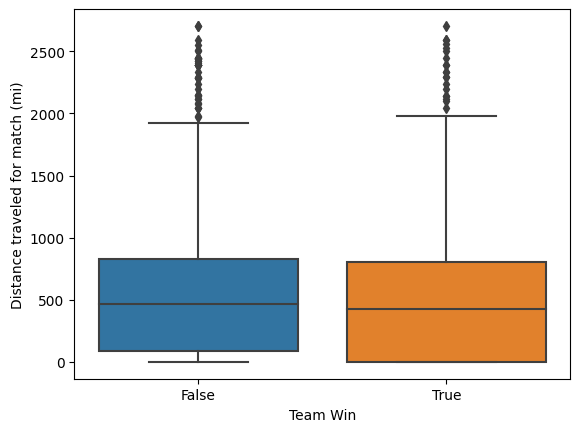

In [ ]:
bp1 = sns.boxplot(y='match_dist', x='team_win', data=combined)
bp1.set_xlabel('Team Win')
bp1.set_ylabel('Distance traveled for match (mi)')


It appears that distance traveled for the match may have a relationship with team outcome. The interquartile range is tighter for team loss (False), and the first quartile is greater as well. This may indicate that of the teams who lost, more of them have traveled a greater distance than the teams who won.

Cumulative distance traveled so far in the season

Text(0, 0.5, 'Cumulative distance traveled at time of match (mi)')

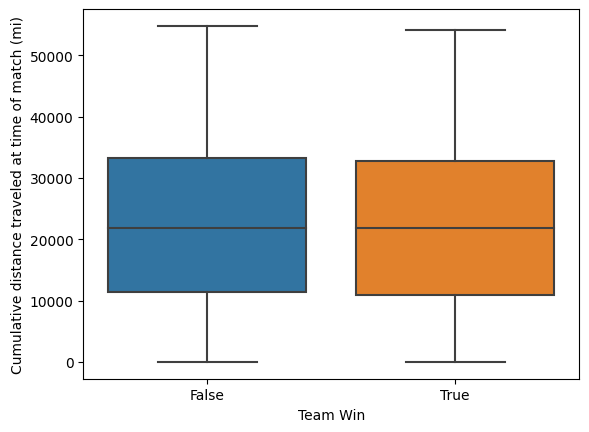

In [ ]:
bp2 = sns.boxplot(y='team_dist', x='team_win', data=combined)
bp2.set_xlabel('Team Win')
bp2.set_ylabel('Cumulative distance traveled at time of match (mi)')

It appears that cumulative distance does not have any relationship with team outcome, since all quartiles seem to be comparable between loss (False) and win (True). This may be due to that fact that all teams accumulate distance throughout a season, but each game must still have a winner and loser such that any possible effects of distance traveled are canceled out.

It is possible that distance traveled (for a match or cumulatively) has an impact on team performance, but not so greatly as to completely change the outcome of win or loss. Instead of a binary match outcome for the team, we now consider percentage of total points scored for the game. We've created scatterplots of distance vs percentage of points scored for a match.

Distance traveled for a single match

Text(0, 0.5, 'Percentage of total match points scored')

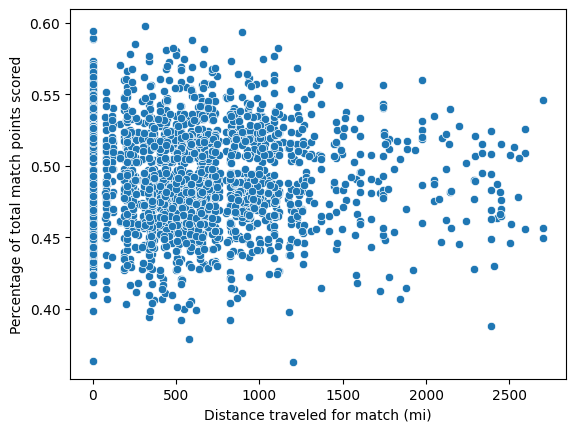

In [ ]:
sp1 = sns.scatterplot(x='match_dist', y='percent_points', data=combined)
sp1.set_xlabel('Distance traveled for match (mi)')
sp1.set_ylabel('Percentage of total match points scored')

There does not seem to be a relationship between distance traveled for the match and percentage of points the team scored. Generally, for any value of distance traveled, the points are symmetric across the 0.50 value for percentage of points scored instead of forming any linear relationship.

Cumulative distance traveled so far in the season

Text(0, 0.5, 'Percentage of total match points scored')

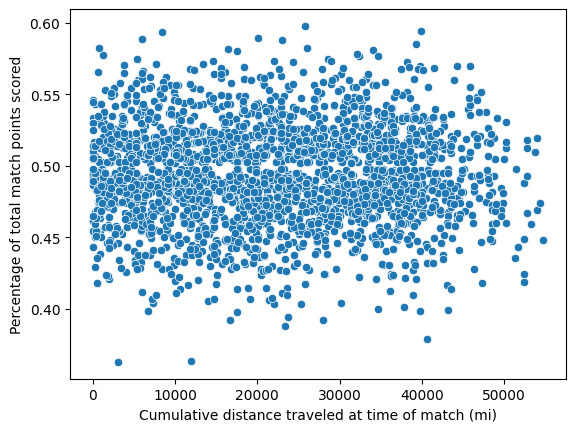

In [ ]:
sp2 = sns.scatterplot(x='team_dist', y='percent_points', data=combined)
sp2.set_xlabel('Cumulative distance traveled at time of match (mi)')
sp2.set_ylabel('Percentage of total match points scored')

In [ ]:
model = smf.ols(formula='percent_points ~ team_dist', data=combined)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         percent_points   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02765
Date:                Tue, 13 Jun 2023   Prob (F-statistic):              0.868
Time:                        21:28:47   Log-Likelihood:                 4813.2
No. Observations:                2459   AIC:                            -9622.
Df Residuals:                    2457   BIC:                            -9611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4936      0.001    365.224      0.000       0.491       0.496
team_dist  -8.689e-09   5.23e-08     -0.166      0.868   -1.11e-07    9.38e-08
==============================================================================
Omnibus:                        2.595   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.518
Skew:                          -0.074   Prob(JB):                        0.284
Kurtosis:                       3.052   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This regresion is to see if there is a connection between percent points as a function of team distance. We see that the condition number is very high and is indicitive of multicolinearity. Overall, this is again pointing to our conclusion that there is not a strong connection between distance traveled and winning games in the NBA.

Based on the results of our regression we can see that there doesn’t appear to be a strong relationship between travel distances and the amount of games won by a particular NBA team. Our F stat of 0.868 is high and with a high p-value, it indicates that the relationship is not statistically significant. There is insufficient evidence to support the null hypothesis. It is important to also note that a high p value does not explicitly mean there is no relationship, just that our data did not present one.

Text(0, 0.5, 'Percent of Games Won')

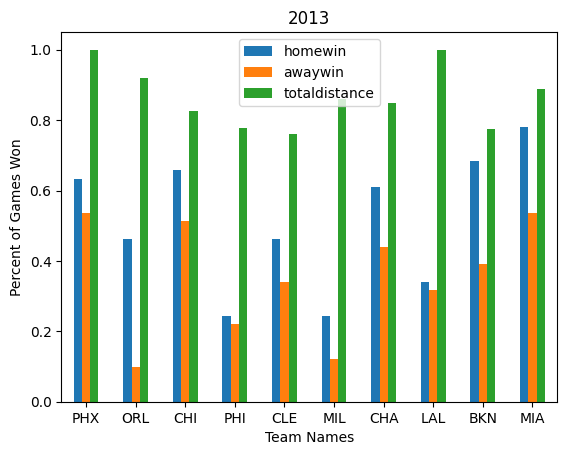

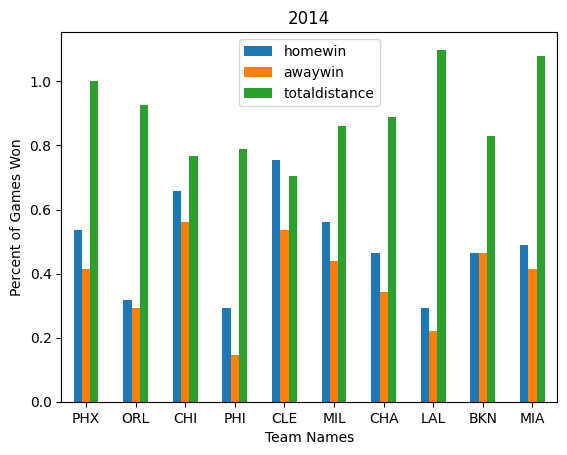

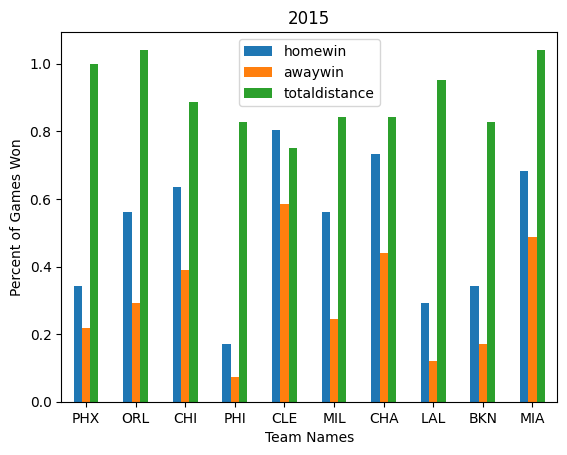

In [ ]:

index = ['PHX', 'ORL', 'CHI','PHI','CLE','MIL','CHA','LAL','BKN','MIA']

homewin_13 = [PHX_13_home['home_win'].value_counts()[True] / 41, ORL_13_home['home_win'].value_counts()[True] / 41, CHI_13_home['home_win'].value_counts()[True] / 41, PHI_13_home['home_win'].value_counts()[True] / 41,CLE_13_home['home_win'].value_counts()[True] / 41, MIL_13_home['home_win'].value_counts()[True] / 41,CHA_13_home['home_win'].value_counts()[True] / 41, LAL_13_home['home_win'].value_counts()[True] / 41,BKN_13_home['home_win'].value_counts()[True] / 41, MIA_13_home['home_win'].value_counts()[True] / 41 ]
awaywin_13 = [PHX_13_away['away_win'].value_counts()[True] / 41, ORL_13_away['away_win'].value_counts()[True] / 41, CHI_13_away['away_win'].value_counts()[True] / 41, PHI_13_away['away_win'].value_counts()[True] / 41,CLE_13_away['away_win'].value_counts()[True] / 41, MIL_13_away['away_win'].value_counts()[True] / 41,CHA_13_away['away_win'].value_counts()[True] / 41, LAL_13_away['away_win'].value_counts()[True] / 41,BKN_13_away['away_win'].value_counts()[True] / 41, MIA_13_away['away_win'].value_counts()[True] / 41 ]
totaldistance_13 = [PHX_13['team_dist'].iloc[-1]/50237.90473978454, ORL_13['team_dist'].iloc[-1]/50237.90473978454, CHI_13['team_dist'].iloc[-1]/50237.90473978454, PHI_13['team_dist'].iloc[-1]/50237.90473978454, CLE_13['team_dist'].iloc[-1]/50237.90473978454, MIL_13['team_dist'].iloc[-1]/50237.90473978454, CHA_13['team_dist'].iloc[-1]/50237.90473978454, LAL_13['team_dist'].iloc[-1]/50237.90473978454, BKN_13['team_dist'].iloc[-1]/50237.90473978454, MIA_13['team_dist'].iloc[-1]/50237.90473978454]
df = pd.DataFrame({'homewin' : homewin_13, 'awaywin' : awaywin_13, 'totaldistance' : totaldistance_13}, index=index)
ax = df.plot.bar(rot=0, title = '2013')
plt.xlabel('Team Names')
plt.ylabel('Percent of Games Won')


homewin_14 = [PHX_14_home['home_win'].value_counts()[True] / 41, ORL_14_home['home_win'].value_counts()[True] / 41, CHI_14_home['home_win'].value_counts()[True] / 41, PHI_14_home['home_win'].value_counts()[True] / 41,CLE_14_home['home_win'].value_counts()[True] / 41, MIL_14_home['home_win'].value_counts()[True] / 41,CHA_14_home['home_win'].value_counts()[True] / 41, LAL_14_home['home_win'].value_counts()[True] / 41,BKN_14_home['home_win'].value_counts()[True] / 41, MIA_14_home['home_win'].value_counts()[True] / 41 ]
awaywin_14 = [PHX_14_away['away_win'].value_counts()[True] / 41, ORL_14_away['away_win'].value_counts()[True] / 41, CHI_14_away['away_win'].value_counts()[True] / 41, PHI_14_away['away_win'].value_counts()[True] / 41,CLE_14_away['away_win'].value_counts()[True] / 41, MIL_14_away['away_win'].value_counts()[True] / 41,CHA_14_away['away_win'].value_counts()[True] / 41, LAL_14_away['away_win'].value_counts()[True] / 41,BKN_14_away['away_win'].value_counts()[True] / 41, MIA_14_away['away_win'].value_counts()[True] / 41 ]
totaldistance_14 = [PHX_14['team_dist'].iloc[-1]/49837.60756261743, ORL_14['team_dist'].iloc[-1]/49837.60756261743, CHI_14['team_dist'].iloc[-1]/49837.60756261743, PHI_14['team_dist'].iloc[-1]/49837.60756261743, CLE_14['team_dist'].iloc[-1]/49837.60756261743, MIL_14['team_dist'].iloc[-1]/49837.60756261743, CHA_14['team_dist'].iloc[-1]/49837.60756261743, LAL_14['team_dist'].iloc[-1]/49837.60756261743, BKN_14['team_dist'].iloc[-1]/49837.60756261743, MIA_14['team_dist'].iloc[-1]/49837.60756261743]
df = pd.DataFrame({'homewin' : homewin_14, 'awaywin' : awaywin_14, 'totaldistance' : totaldistance_14}, index=index)
ax = df.plot.bar(rot=0, title = '2014')
plt.xlabel('Team Names')
plt.ylabel('Percent of Games Won')

homewin_15 = [PHX_15_home['home_win'].value_counts()[True] / 41, ORL_15_home['home_win'].value_counts()[True] / 41, CHI_15_home['home_win'].value_counts()[True] / 41, PHI_15_home['home_win'].value_counts()[True] / 41,CLE_15_home['home_win'].value_counts()[True] / 41, MIL_15_home['home_win'].value_counts()[True] / 41,CHA_15_home['home_win'].value_counts()[True] / 41, LAL_15_home['home_win'].value_counts()[True] / 41,BKN_15_home['home_win'].value_counts()[True] / 41, MIA_15_home['home_win'].value_counts()[True] / 41 ]
awaywin_15 = [PHX_15_away['away_win'].value_counts()[True] / 41, ORL_15_away['away_win'].value_counts()[True] / 41, CHI_15_away['away_win'].value_counts()[True] / 41, PHI_15_away['away_win'].value_counts()[True] / 41,CLE_15_away['away_win'].value_counts()[True] / 41, MIL_15_away['away_win'].value_counts()[True] / 41,CHA_15_away['away_win'].value_counts()[True] / 41, LAL_15_away['away_win'].value_counts()[True] / 41,BKN_15_away['away_win'].value_counts()[True] / 41, MIA_15_away['away_win'].value_counts()[True] / 41 ]
totaldistance_15 = [PHX_15['team_dist'].iloc[-1]/47002.02998492472, ORL_15['team_dist'].iloc[-1]/47002.02998492472, CHI_15['team_dist'].iloc[-1]/47002.02998492472, PHI_15['team_dist'].iloc[-1]/47002.02998492472, CLE_15['team_dist'].iloc[-1]/47002.02998492472, MIL_15['team_dist'].iloc[-1]/47002.02998492472, CHA_15['team_dist'].iloc[-1]/47002.02998492472, LAL_15['team_dist'].iloc[-1]/47002.02998492472, BKN_15['team_dist'].iloc[-1]/47002.02998492472, MIA_15['team_dist'].iloc[-1]/47002.02998492472]
df = pd.DataFrame({'homewin' : homewin_15, 'awaywin' : awaywin_15, 'totaldistance' : totaldistance_15}, index=index)
ax = df.plot.bar(rot=0, title = '2015')
plt.xlabel('Team Names')
plt.ylabel('Percent of Games Won')


The above visualizations display the home/road winning percentages per season of analysis alongside total distance traveled in that season. We calculated distance traveled as a proportion so we could compare them to the home/road splits. These graphs show no indication that there is any correlation between home/road winning percentages.

## Ethics and Privacy
When we formulated our question, we considered the ethical implications and whether our research would be harmful to others, espcially the players or members of the team. Since our question only deals with the outcomes of games based on travel and all the information of stadium coordinates and dates of games are public information we see no way this information could be used in a nefarious manner. In reguards to the players, we are not using an individuals data and thus no personal data is at risk to be divulged.

Since none of our team has any connection to any NBA teams we were able to handle the data in an unbiased and safe way.


# Conclusion & Discussion

### Conclusion of Analysis

In conclusion, we reject our null hypothesis, our analysis aimed at determining if there was a relationship between NBA team travel distances and teams wins did not produce significant results. In comparing the connection between variables, the findings suggest that travel distance alone does not have a substantial impact on the outcome of the games. While travel distances may influence the team to a certain extent, they do not appear to be the dominating factor in determining a teams success. In future research, exploration of travel distance along with other variables may produce more significant results.

### Limitation and Weakness

This project contains weaknesses in that it doesn't take into account individual players on each team, along with coaches and trainers. The analysis is done assuming each team starts off as being equal, which is far from the case in any sports league. In order to run a more effective study, temporal precedence must be established.

A limitation we faced when creating our dataset was that we could not find a dataset that had the distance from each arena to another so we had to create our own columns for this and calculate using the haversine formula. We realize that this is not the exact distance the team travelled because we do not know the exact route, but since it is standard amoung all teams in the league we feel it is an acceptable substitute.

In our research, we came across many limit factors in determining the true answer to our question. In gathering the data, we had to rely on already established datasets, that contained relevant information but not all the information that we needed. Ideally, we would have had information on not just the travel distances and wins, but on the coaches, which players were starting, and possibly injury reports. We recognize that there are more confounding factors to consider but were only to able to work with what was accessible.
Since we were unable to obtain all confounding factors, we were only able to perform a simple regression, as opposed to a multiple regression. While we were able to come to a conclusion, we may have been able to come to a more accurate of possibly different conclusion had we been able to consider all factors.


# Team Contributions
All team members atteneded all meetings and collaborated on project ideas.

Seanna Pierce - Data Collection, Data Wranging, EDA, Conclusion

Noah Poremba - Data Collection, Data Cleaning, Background/Prior Work, Video

Emily Parise - Data Collection, Write Ups, EDA

Jennifer Qi - Data Collection, Data Wrangling, EDA